In [26]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

## Load data 

* 고객정보

In [2]:
customer = pd.read_table(r'C:\Users\soug9\Desktop\Shcard Summer School\data\01_고객정보.txt',
                         sep=';',  engine='python')

In [3]:
customer.head()

,CLNN,SEX_CCD,HM_ZPN
0,Z9379301951ST,F,5245
1,Z9733001951ST,F,14574
2,Z9863801951ST,F,14602
3,Z0277101961ST,M,14049
4,Z0335501961ST,M,35206


* 승인정보

In [17]:
transaction = pd.read_table(r'C:\Users\soug9\Desktop\Shcard Summer School\data\02_승인정보.txt',
                         sep=';',  engine='python')

In [5]:
transaction.head()

,CLNN,APV_TS_D,TIME,MCT_N,USE_AMT
0,Z0013222301ST,20170925,8,4016501036KM,C
1,Z0013222301ST,20171020,18,1524901023KM,F
2,Z0013257851ST,20171020,15,5478500495KM,F
3,Z0014237071ST,20170814,14,9815800667KM,C
4,Z0014237071ST,20170814,7,3310500677KM,J


* 가맹점정보

In [7]:
#store = pd.read_table(r'C:\Users\soug9\Desktop\Shcard Summer School\data\03_가맹점정보.txt', sep=';',  engine='python')

f=open(r'C:\Users\soug9\Desktop\Shcard Summer School\data\03_가맹점정보.txt','r')

trans=[]
for line in f:
    trans.append(line.strip())

for i in range(len(trans)) :
    trans[i] = trans[i].split(';')

store = pd.DataFrame.from_records(trans[1:])    
store.columns = trans[0]

In [8]:
store.head()

,MCT_N,MCT_NM,UPJONG_GB_1,MCT_ZPN
0,8600701034KM,엠와,결혼,04025
1,4238501060KM,함께,결혼,07025
2,5366100472KM,미래,결혼,24377
3,4578701049KM,힐링,결혼,48953
4,3937000873KM,홀인,골프,10120


* 온라인유료콘텐츠

In [10]:
online = pd.read_table(r'C:\Users\soug9\Desktop\Shcard Summer School\data\04_온라인유료콘텐츠.txt',
                         sep=';',  engine='python')

In [11]:
online.head()

,CLNN,APV_TS_D,TIME,MCT_N,USE_AMT
0,Z6714298021ST,20171007,23,5109500009KM,C
1,Z0753229081ST,20180703,17,5109500009KM,E
2,Z3514236191ST,20180212,15,5109500009KM,F
3,Z3514236191ST,20180211,22,5109500009KM,E
4,Z2263249201ST,20171028,12,5109500009KM,A


* 이용금액 코드표

In [12]:
use_amt = pd.read_table(r'C:\Users\soug9\Desktop\Shcard Summer School\data\이용금액 코드표.txt',
                         sep='\t',  engine='python')

# deal with use_amt
use_amt['AMT1'] = use_amt['AMT']
use_amt['AMT1'] = use_amt['AMT1'].apply(lambda x : re.sub('천원이하','000',x))
use_amt['AMT1'] = use_amt['AMT1'].apply(lambda x : re.sub('만원이하','0000',x))
use_amt['AMT1'] = use_amt['AMT1'].apply(lambda x : re.sub('만원초과','0001',x))
use_amt['AMT1'] = use_amt['AMT1'].astype('int')

In [13]:
use_amt.head()

,USE_AMT,AMT,AMT1
0,A,5천원이하,5000
1,B,10천원이하,10000
2,C,15천원이하,15000
3,D,20천원이하,20000
4,E,30천원이하,30000


## Merge data

* use_amt + online

In [14]:
online = pd.merge(online, use_amt, on='USE_AMT')

In [15]:
online.head()

,CLNN,APV_TS_D,TIME,MCT_N,USE_AMT,AMT,AMT1
0,Z6714298021ST,20171007,23,5109500009KM,C,15천원이하,15000
1,Z3263216341ST,20180215,10,5109500009KM,C,15천원이하,15000
2,Z1824284811ST,20180426,16,5109500009KM,C,15천원이하,15000
3,Z3263216341ST,20180507,17,5109500009KM,C,15천원이하,15000
4,Z6114264201ST,20180108,23,5109500009KM,C,15천원이하,15000


* use_amt + transaction

In [18]:
transaction = pd.merge(transaction, use_amt, on='USE_AMT')

In [19]:
transaction.head()

,CLNN,APV_TS_D,TIME,MCT_N,USE_AMT,AMT,AMT1
0,Z0013222301ST,20170925,8,4016501036KM,C,15천원이하,15000
1,Z0014237071ST,20170814,14,9815800667KM,C,15천원이하,15000
2,Z0024224741ST,20180324,15,9988400799KM,C,15천원이하,15000
3,Z0024248271ST,20180318,15,0589500503KM,C,15천원이하,15000
4,Z0043211871ST,20180122,11,3056000014KM,C,15천원이하,15000


* online + customer + store

In [20]:
online_new = pd.merge(online[['CLNN', 'APV_TS_D', 'TIME', 'MCT_N', 'AMT1']], customer, how='left')
online_new = pd.merge(online_new, store, how='left')

In [21]:
online_new.head()

,CLNN,APV_TS_D,TIME,MCT_N,AMT1,SEX_CCD,HM_ZPN,MCT_NM,UPJONG_GB_1,MCT_ZPN
0,Z6714298021ST,20171007,23,5109500009KM,15000,F,14264,인터,홈/인터넷쇼핑,04389
1,Z3263216341ST,20180215,10,5109500009KM,15000,F,14218,인터,홈/인터넷쇼핑,04389
2,Z1824284811ST,20180426,16,5109500009KM,15000,M,39290,인터,홈/인터넷쇼핑,04389
3,Z3263216341ST,20180507,17,5109500009KM,15000,F,14218,인터,홈/인터넷쇼핑,04389
4,Z6114264201ST,20180108,23,5109500009KM,15000,F,14077,인터,홈/인터넷쇼핑,04389


## Preprocessing 

* APV_TS_D + TIME = create new feature named 'DATETIME' whose type is datetime

In [22]:
online_new['APV_TS_D'].value_counts().sort_index()

20170801     8
20170802    11
20170803     8
20170804    10
20170805     5
20170806     8
20170807     8
20170808     6
20170809     7
20170810     9
20170811     9
20170812     6
20170813     5
20170814     8
20170815     8
20170816    13
20170817     7
20170818    11
20170819     8
20170820     5
20170821    10
20170822     6
20170823     2
20170824     8
20170825     5
20170826     4
20170827     5
20170828     6
20170829    10
20170830    14
            ..
20180702    12
20180703    13
20180704    13
20180705     8
20180706     9
20180707     9
20180708     7
20180709     7
20180710    13
20180711     9
20180712     6
20180713    10
20180714    11
20180715     4
20180716     6
20180717    10
20180718     7
20180719     7
20180720     7
20180721    10
20180722     7
20180723    10
20180724     6
20180725     6
20180726    10
20180727    11
20180728     4
20180729     5
20180730     7
20180731     6
Name: APV_TS_D, Length: 365, dtype: int64

In [23]:
online_new['TIME'].value_counts()

17    540
9     421
18    352
10    214
8     140
14    115
11    108
1     103
16    103
15     94
12     94
0      88
13     87
2      84
20     74
19     73
22     70
23     64
21     47
3      46
6      21
4      20
5      16
7      16
Name: TIME, dtype: int64

In [24]:
online_new['APV_TS_D'] = online_new['APV_TS_D'].astype(str)

online_new['DATETIME'] = online_new[['APV_TS_D', 
          'TIME']].apply(lambda x : datetime.datetime(int(x.values[0][:4]),
          int(x.values[0][4:6]), int(x.values[0][6:8]),
          x.values[1]), axis=1)

In [25]:
online_new.head()

,CLNN,APV_TS_D,TIME,MCT_N,AMT1,SEX_CCD,HM_ZPN,MCT_NM,UPJONG_GB_1,MCT_ZPN,DATETIME
0,Z6714298021ST,20171007,23,5109500009KM,15000,F,14264,인터,홈/인터넷쇼핑,04389,2017-10-07 23:00:00
1,Z3263216341ST,20180215,10,5109500009KM,15000,F,14218,인터,홈/인터넷쇼핑,04389,2018-02-15 10:00:00
2,Z1824284811ST,20180426,16,5109500009KM,15000,M,39290,인터,홈/인터넷쇼핑,04389,2018-04-26 16:00:00
3,Z3263216341ST,20180507,17,5109500009KM,15000,F,14218,인터,홈/인터넷쇼핑,04389,2018-05-07 17:00:00
4,Z6114264201ST,20180108,23,5109500009KM,15000,F,14077,인터,홈/인터넷쇼핑,04389,2018-01-08 23:00:00


## EDA 

* DATETIME

In [27]:
plt.style.use('ggplot')

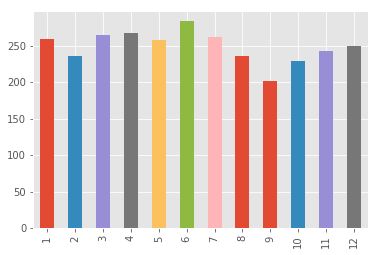

In [29]:
# month
online_new['DATETIME'].dt.month.value_counts().sort_index().plot.bar()

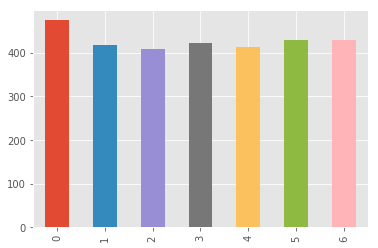

In [30]:
# weekday
# 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일
online_new['DATETIME'].dt.weekday.value_counts().sort_index().plot.bar()

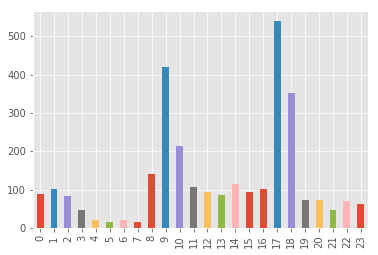

In [31]:
# time
online_new['DATETIME'].dt.hour.value_counts().sort_index().plot.bar()

* UPJONG_GB_1, MCT_NM

In [62]:
online_new['UPJONG_GB_1'].value_counts()

홈/인터넷쇼핑    2618
미분류         271
영화           72
기타쇼핑         25
전자제품          4
Name: UPJONG_GB_1, dtype: int64

In [61]:
## 뭐샀는지 알길이 없다...
online_new['MCT'] = online_new[['MCT_N', 
                 'MCT_NM']].apply(lambda x : '{}_{}'.format(x.values[0], x.values[1]), axis=1)

In [63]:
online_new['MCT'].value_counts()

8306000761KM_(주    1177
4869800828KM_PA     440
7808000429KM_이니     251
8008600877KM_Ne     195
0529901023KM_(주     170
5109500009KM_인터     152
0439100764KM_(주      81
8632400443KM_CJ      72
2341500784KM_벅스      60
7690500748KM_NH      58
5798400873KM_씨제      55
0674201085KM_푹T      43
7614300853KM_카카      40
4975200782KM_LG      31
6714000849KM_NH      30
2557400134KM_kc      27
7253801047KM_페이      24
0563000409KM_kc      17
3435100686KM_주식      15
9931900773KM_주식      15
5347500781KM_씨제      11
0369701034KM_페이       8
2071600426KM_KC       6
6462000748KM_씨제       4
1276301029KM_11       2
3735000141KM_(P       2
4452101094KM_KC       2
0301901096KM_(주       1
3797001089KM_충전       1
Name: MCT, dtype: int64

In [64]:
online_new['MCT'][online_new['UPJONG_GB_1'] == '영화'].value_counts()

8632400443KM_CJ    72
Name: MCT, dtype: int64

In [65]:
online_new['MCT'][online_new['UPJONG_GB_1'] == '홈/인터넷쇼핑'].value_counts()

8306000761KM_(주    1177
4869800828KM_PA     440
7808000429KM_이니     251
8008600877KM_Ne     195
5109500009KM_인터     152
0439100764KM_(주      81
2341500784KM_벅스      60
7690500748KM_NH      58
7614300853KM_카카      40
4975200782KM_LG      31
6714000849KM_NH      30
2557400134KM_kc      27
0563000409KM_kc      17
9931900773KM_주식      15
3435100686KM_주식      15
5347500781KM_씨제      11
0369701034KM_페이       8
2071600426KM_KC       6
3735000141KM_(P       2
4452101094KM_KC       2
Name: MCT, dtype: int64

In [66]:
online_new['MCT'][online_new['UPJONG_GB_1'] == '기타쇼핑'].value_counts()

7253801047KM_페이    24
0301901096KM_(주     1
Name: MCT, dtype: int64

In [67]:
online_new['MCT'][online_new['UPJONG_GB_1'] == '미분류'].value_counts()

0529901023KM_(주    170
5798400873KM_씨제     55
0674201085KM_푹T     43
1276301029KM_11      2
3797001089KM_충전      1
Name: MCT, dtype: int64

In [68]:
online_new['MCT'][online_new['UPJONG_GB_1'] == '전자제품'].value_counts()

6462000748KM_씨제    4
Name: MCT, dtype: int64

* AMT1

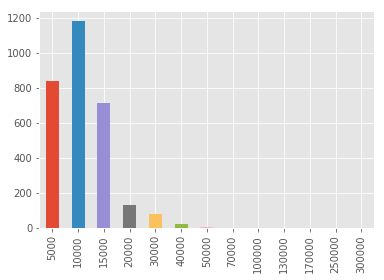

In [32]:
online_new['AMT1'].value_counts().sort_index().plot.bar()

10000원 이하 결제한 상품들은 어떤 것일까

In [79]:
amt10000 = online_new[['MCT','UPJONG_GB_1']][online_new['AMT1'] == 10000]

In [69]:
# 업종
labels, ratio = np.unique(amt10000['UPJONG_GB_1'], return_counts = True)

In [70]:
labels

array(['기타쇼핑', '미분류', '영화', '전자제품', '홈/인터넷쇼핑'], dtype=object)

In [71]:
ratio

array([ 19, 110,  69,   4, 981], dtype=int64)

([<matplotlib.patches.Wedge at 0x2d6d60183c8>,
 [Text(-0.0554788,1.0986,'기타쇼핑'),
  Text(-0.421289,1.01613,'미분류'),
  Text(-0.839616,0.710665,'영화'),
  Text(-0.960796,0.535603,'전자제품'),
  Text(0.562182,-0.94549,'홈/인터넷쇼핑')])

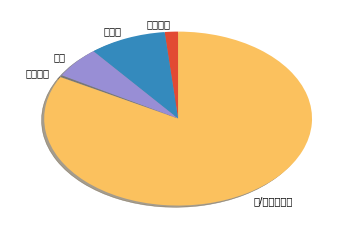

In [73]:
plt.pie(ratio, labels=labels, shadow=True, startangle=90)

In [90]:
# 상품명
labels1, ratio1 = np.unique(amt10000['MCT'], return_counts = True)

In [91]:
labels1

array(['0369701034KM_페이', '0439100764KM_(주', '0529901023KM_(주',
       '0563000409KM_kc', '0674201085KM_푹T', '1276301029KM_11',
       '2341500784KM_벅스', '2557400134KM_kc', '3435100686KM_주식',
       '4869800828KM_PA', '4975200782KM_LG', '5109500009KM_인터',
       '5347500781KM_씨제', '5798400873KM_씨제', '6462000748KM_씨제',
       '6714000849KM_NH', '7253801047KM_페이', '7614300853KM_카카',
       '7690500748KM_NH', '7808000429KM_이니', '8306000761KM_(주',
       '8632400443KM_CJ', '9931900773KM_주식'], dtype=object)

In [92]:
ratio1

array([  1,  13,  39,  17,  33,   1,  60,   3,   3, 132,   5,  23,   2,
        37,   4,  30,  19,   2,  42, 177, 470,  69,   1], dtype=int64)

([<matplotlib.patches.Wedge at 0x2d6d5929470>,
 [Text(-0.00292117,1.1,'0369701034KM_페이'),
  Text(-0.0438061,1.09913,'0439100764KM_(주'),
  Text(-0.194688,1.08263,'0529901023KM_(주'),
  Text(-0.352949,1.04184,'0563000409KM_kc'),
  Text(-0.487773,0.98594,'0674201085KM_푹T'),
  Text(-0.574686,0.937942,'1276301029KM_11'),
  Text(-0.718438,0.832974,'2341500784KM_벅스'),
  Text(-0.847118,0.701706,'2557400134KM_kc'),
  Text(-0.85819,0.68812,'3435100686KM_주식'),
  Text(-1.04507,0.343251,'4869800828KM_PA'),
  Text(-1.09881,-0.0511022,'4975200782KM_LG'),
  Text(-1.09198,-0.13259,'5109500009KM_인터'),
  Text(-1.08078,-0.204742,'5347500781KM_씨제'),
  Text(-1.05382,-0.31538,'5798400873KM_씨제'),
  Text(-1.01331,-0.428026,'6462000748KM_씨제'),
  Text(-0.970586,-0.517651,'6714000849KM_NH'),
  Text(-0.895211,-0.639216,'7253801047KM_페이'),
  Text(-0.85819,-0.68812,'7614300853KM_카카'),
  Text(-0.772116,-0.783477,'7690500748KM_NH'),
  Text(-0.214778,-1.07883,'7808000429KM_이니'),
  Text(1.09867,-0.0540201,'8306000761KM_(

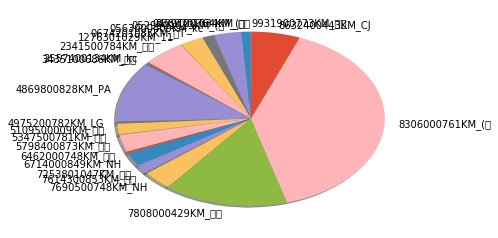

In [83]:
plt.pie(ratio1, labels=labels1, shadow=True, startangle=90)